# Data access and cleaning
Will access data files and apis, clean data, and present data to be analyzed

In [257]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings


warnings.filterwarnings('ignore')

In [240]:
# Load data files

# Crime data
crime_data_csv = "../data/crime/2012_2016_CrimeRate.csv"
crime_data_df = pd.read_csv(crime_data_csv)

crime_data_df.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,Latitude,Longitude
0,6/29/2014,141611067,7/12/2014,1,16,Foothill,1684,121,"RAPE, FORCIBLE",IC,Invest Cont,34.2103,-118.3954
1,3/13/2014,141315628,7/31/2014,1,13,Newton,1321,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,34.0320,-118.2667
2,5/15/2014,141918556,9/8/2014,1,19,Mission,1967,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",IC,Invest Cont,34.2330,-118.4386
3,12/31/2012,121228703,12/31/2012,1,12,77th Street,1249,510,VEHICLE - STOLEN,IC,Invest Cont,33.9823,-118.2841
4,1/11/2013,130204589,12/31/2012,1,2,Rampart,204,740,VANDALISM,AO,Adult Other,34.0787,-118.2844


In [241]:
renamed_crime_df = crime_data_df.rename(columns={"Date.Rptd":"Date Reported",
                                                 "DR.NO":"Case Number",
                                                 "DATE.OCC":"Date Occurred",
                                                 "TIME.OCC":"Time Occurred",
                                                 "AREA": "Area",
                                                 "AREA.NAME":"Area Name",
                                                 "Crm.Cd":"Crime Code",
                                                 "CrmCd.Desc":"Crime Description",
                                                 "Status.Desc":"Status Description"})

data_replace = renamed_crime_df.replace({'ASSAULT WITH DEADLY WEAPON':'ADW', 'BATTERY':'Battery', 'THEFT':'Theft', 'VANDALISM':'Vandalism'})
data_fix = data_replace.loc[((data_replace['Crime Description'] == 'ADW') | (data_replace['Crime Description'] == 'Battery') | (data_replace['Crime Description'] == 'Theft') | (data_replace['Crime Description'] == 'Vandalism'))]
data_fix.head()

,Date Reported,Case Number,Date Occurred,Time Occurred,Area,Area Name,RD,Crime Code,Crime Description,Status,Status Description,Latitude,Longitude
4,1/11/2013,130204589,12/31/2012,1,2,Rampart,204,740,Vandalism,AO,Adult Other,34.0787,-118.2844
8,1/27/2013,130705069,12/31/2012,1,7,Wilshire,762,740,Vandalism,IC,Invest Cont,34.0496,-118.3747
18,12/30/2012,120327673,12/30/2012,1,3,Southwest,316,740,Vandalism,IC,Invest Cont,34.0337,-118.3031
21,12/30/2012,122022144,12/30/2012,1,20,Olympic,2044,624,Battery,IC,Invest Cont,34.0577,-118.2998
22,12/30/2012,122022162,12/30/2012,1,20,Olympic,2093,740,Vandalism,IC,Invest Cont,34.0400,-118.3032


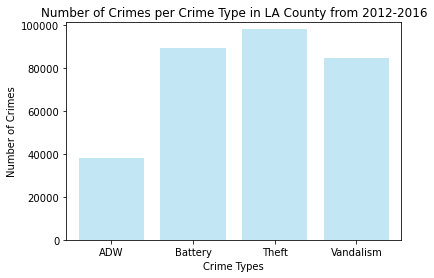

In [242]:
crime_type_count = data_fix.groupby('Crime Description')['Crime Code'].count()
crime_counts = crime_type_count.to_list()
x_axis = crime_type_count.index.to_list()

plt.bar(x_axis, crime_counts, color = 'skyblue',  alpha = 0.5, align = 'center')

plt.xlim(-0.55, len(x_axis) - 0.45)
plt.ylim(0, max(crime_counts) + 3000)

plt.title("Number of Crimes per Crime Type in LA County from 2012-2016")
plt.xlabel("Crime Types")
plt.ylabel("Number of Crimes")

#output_image = f'Output_Data/Num_Crimes_Bar_2012_2016.png'
#plt.tight_layout()
#plt.savefig(output_image)

plt.show()

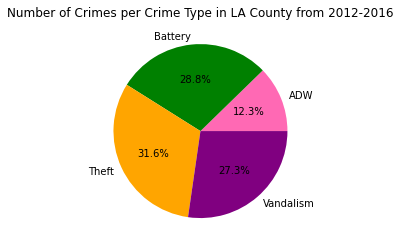

In [243]:
colors = ["hotpink","green", "orange", "purple"]
plt.pie(crime_counts, labels=x_axis, colors=colors, autopct="%1.1f%%")
plt.title("Number of Crimes per Crime Type in LA County from 2012-2016")

#output_image = f'Output_Data/Num_Crimes_Pie_2012_2016.png'
#plt.tight_layout()
#plt.savefig(output_image)

plt.show()

In [258]:
year_occurred = []

for crime in data_fix['Date Occurred']:
    year = crime.split('/')
    year_occurred.append(year[2])
    
data_fix['Year of Crime'] = year_occurred
crimes_per_year = data_fix.groupby('Year of Crime')['Crime Description'].count()
crime_counts_per_year = crimes_per_year.to_list()

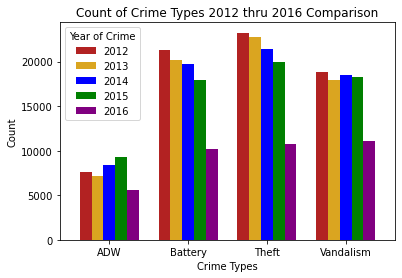

In [253]:
crime_types_counts_per_year = data_fix.groupby(['Crime Description', 'Year of Crime'])['Crime Code'].count()

colors = ['firebrick', 'goldenrod', 'blue', 'green', 'purple']
labels = ['ADW', 'Battery', 'Theft', 'Vandalism']

crime_types_counts_per_year.unstack().plot.bar(rot = 0, color = colors, width = 0.75)

plt.title('Count of Crime Types 2012 thru 2016 Comparison')
plt.xlabel('Crime Types')
plt.ylabel('Count')

#output_image = f'Output_Data/Num_Crimes_2012_2016_per_year.png'
#plt.tight_layout()
#plt.savefig(output_image)

plt.show()

In [254]:
# Homelessness Data
homeless_data_csv = "../data/crime/2007-2016-Homelessness-USA.csv"
homeless_data_df = pd.read_csv(homeless_data_csv)

# Grabbing Total Homeless Count for 2012 and 2013
homeless_counts = homeless_data_df.loc[((homeless_data_df['Measures'] == "Total Homeless") & (homeless_data_df['CoC Name'] == "Los Angeles City & County CoC") & (homeless_data_df['State'] == 'CA')) & ((homeless_data_df['Year'] == "1/1/2012") | (homeless_data_df['Year'] == "1/1/2013") | (homeless_data_df['Year'] == "1/1/2014") | (homeless_data_df['Year'] == "1/1/2015") | (homeless_data_df['Year'] == "1/1/2016"))]
homeless_counts_fixed = homeless_counts.replace(',','',regex=True)
homeless_counts_fixed

,Year,State,CoC Number,CoC Name,Measures,Count
28561,1/1/2012,CA,CA-600,Los Angeles City & County CoC,Total Homeless,31553
36919,1/1/2013,CA,CA-600,Los Angeles City & County CoC,Total Homeless,35524
45319,1/1/2014,CA,CA-600,Los Angeles City & County CoC,Total Homeless,34393
54804,1/1/2015,CA,CA-600,Los Angeles City & County CoC,Total Homeless,41174
71730,1/1/2016,CA,CA-600,Los Angeles City & County CoC,Total Homeless,43854


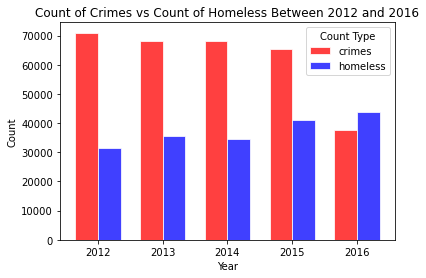

In [256]:
barWidth = 0.35

r1 = np.arange(len(crime_counts_per_year))
r2 = [x + barWidth for x in r1]

y_axis_crimes = crime_counts_per_year
y_axis_homeless = homeless_counts_fixed['Count'].astype(int).to_list()

plt.bar(r1, y_axis_crimes, color = 'red', alpha = 0.75, width = barWidth, edgecolor = 'white', label = 'crimes')
plt.bar(r2, y_axis_homeless, color = 'blue', alpha = 0.75, width = barWidth, edgecolor = 'white', label = 'homeless')

plt.title('Count of Crimes vs Count of Homeless Between 2012 and 2016')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks([r + (barWidth/2) for r in range(len(crime_counts_per_year))], ['2012', '2013', '2014', '2015', '2016'])

plt.legend(loc='upper right', title='Count Type')

#output_image = f'Output_Data/Crime_Homeless_Compare_2012_2016.png'
#plt.tight_layout()
#plt.savefig(output_image)

plt.show()